In [15]:
#1: import the data into python dataframe
import pandas as pd
frame = pd.read_csv(r'C:\\Users\\maria\\OneDrive\\Desktop\\Automobile_price_data__Raw_.csv')
frame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
#2: Clean the data 
import pandas as pd
import numpy as np
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
## Convert the '?' to a nan
for column in cols:
    frame.loc[frame[column] == '?', column] = np.nan
## Coerce colums to numeric
for col in cols:
    frame[col] = pd.to_numeric(frame[col])
## Drop rows with missing values
frame.dropna(axis = 0, inplace = True)
print('dimensions = ' + str(frame.shape)) # print dimensions of the data frame
print(frame.dtypes) # print the data types of the columns

dimensions = (195, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [17]:
#3Create a function to display statistic of a column
def describe(df, col):
## Compute the summary stats
    desc = df[col].describe()
## Change the name of the 50% index to median
    idx = desc.index.tolist()
    idx[5] = 'median'
    desc.index = idx
    return desc

In [18]:
#4:Call the function to get info about price column
describe(frame, 'price')

count       195.000000
mean      13248.015385
std        8056.330093
min        5118.000000
25%        7756.500000
median    10245.000000
75%       16509.000000
max       45400.000000
Name: price, dtype: float64

In [20]:
#5: create a function to plot the graph

def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False,
    return_type='dict')
    ## Plot the histogram
    temp = df[col]
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.ylabel('Number of Cars')
    plt.xlabel(col)
    return [col]

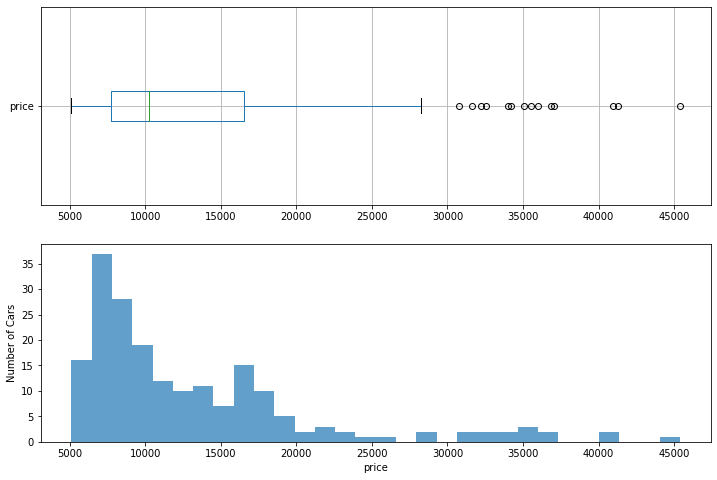

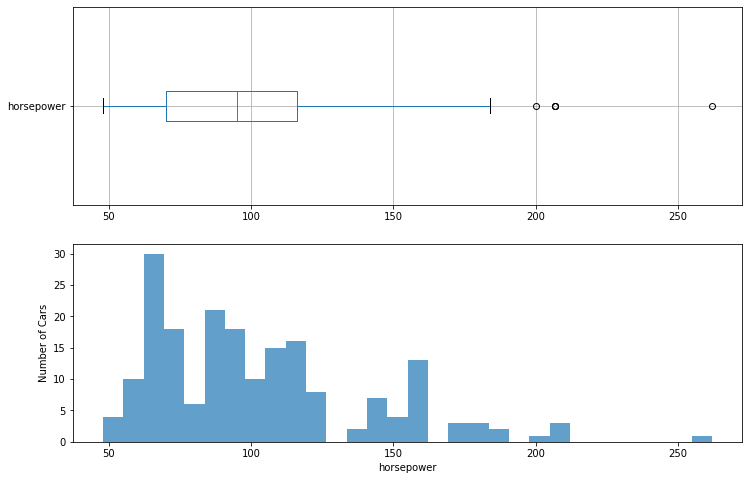

['horsepower']

In [22]:
#6 call the function to create the plot
%matplotlib inline
plotstats(frame, 'price')
plotstats(frame, 'horsepower')